In [1]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier, BaggingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from xgboost import XGBClassifier
import os
from PIL import Image
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
import plotly.express as px
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from lightgbm import LGBMClassifier


In [2]:
X = np.load("C:/Users/user/imagedata/imgnpy/X_train_12000.npy")
y = np.load("C:/Users/user/imagedata/imgnpy/y_train_12000.npy")
for i in range(50,110,10):
    globals()[f'X_test_set_{i}'] = np.load(f"C:/Users/user/imagedata/imgnpy/X_test_set_3_{i}.npy") # globals전역변수르 만들어서 지워지지 않게 만들어짐 자동화 
for i in range(50,110,10):
    globals()[f'y_test_set_{i}'] = np.load(f"C:/Users/user/imagedata/imgnpy/y_test_set_3_{i}.npy")

In [3]:
X = X.reshape(-1, 334*55*3) # 머신러닝 쓸 때는 무조건 평탄화 규제값 추가 50~ 100

X_test_set_50 = X_test_set_50.reshape(-1, 334*55*3)
X_test_set_60 = X_test_set_60.reshape(-1, 334*55*3)
X_test_set_70 = X_test_set_70.reshape(-1, 334*55*3)
X_test_set_80 = X_test_set_80.reshape(-1, 334*55*3)
X_test_set_90 = X_test_set_90.reshape(-1, 334*55*3)
X_test_set_100 = X_test_set_100.reshape(-1, 334*55*3)

In [4]:
print(X_test_set_50.shape)
print(X_test_set_90.shape)
print(X_test_set_70.shape)
print(X_test_set_80.shape)
print(X_test_set_90.shape)
print(X_test_set_100.shape)

(51, 55110)
(51, 55110)
(51, 55110)
(51, 55110)
(51, 55110)
(51, 55110)


In [5]:
X.shape

(11994, 55110)

In [6]:
from sklearn.model_selection import train_test_split # x랑 y를 나누자

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                      test_size=0.2,
                                                      random_state=42,
                                                      shuffle=True, # 할 때 마다 랜덤으로
                                                      stratify=y)

In [ ]:
# Random Forest Classifier
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

# Accuracy
rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

# 실제 데이터 test
rd_clf_real_50 = accuracy_score(y_test_set_50, rd_clf.predict(X_test_set_50))
rd_clf_real_60 = accuracy_score(y_test_set_60, rd_clf.predict(X_test_set_60))
rd_clf_real_70 = accuracy_score(y_test_set_70, rd_clf.predict(X_test_set_70))
rd_clf_real_80 = accuracy_score(y_test_set_80, rd_clf.predict(X_test_set_80))
rd_clf_real_90 = accuracy_score(y_test_set_90, rd_clf.predict(X_test_set_90))
rd_clf_real_100 = accuracy_score(y_test_set_100, rd_clf.predict(X_test_set_100))

#confusion_matrix
rd_cm = confusion_matrix(y_test, rd_clf.predict(X_test))
plot_confusion_matrix(rd_clf, X_test, y_test, cmap='OrRd')
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")
print("정확도 : ", rd_clf_acc)
print("실제 test_set_50 정확도 : ", rd_clf_real_50)
print("실제 test_set_60 정확도 : ", rd_clf_real_60)
print("실제 test_set_70 정확도 : ", rd_clf_real_70)
print("실제 test_set_80 정확도 : ", rd_clf_real_80)
print("실제 test_set_90 정확도 : ", rd_clf_real_90)
print("실제 test_set_100 정확도 : ", rd_clf_real_100)

In [ ]:
plot_confusion_matrix(rd_clf, X_test_set_50, y_test_set_50, cmap='OrRd')
plot_confusion_matrix(rd_clf, X_test_set_60, y_test_set_60, cmap='OrRd')
plot_confusion_matrix(rd_clf, X_test_set_70, y_test_set_70, cmap='OrRd')
plot_confusion_matrix(rd_clf, X_test_set_80, y_test_set_80, cmap='OrRd')
plot_confusion_matrix(rd_clf, X_test_set_90, y_test_set_90, cmap='OrRd')
plot_confusion_matrix(rd_clf, X_test_set_100, y_test_set_100, cmap='OrRd')

In [ ]:
from sklearn.model_selection import cross_val_predict # 분류마다 보여주겡
# 0으로 분류
y_train_0 = (y_train == 0)
y_train_pred = cross_val_predict(rd_clf, X_train, y_train_0, cv=3)
cf_0 = confusion_matrix(y_train_0, y_train_pred)
# 1로 분류
y_train_1 = (y_train == 1)
y_train_pred = cross_val_predict(rd_clf, X_train, y_train_1, cv=3)
cf_1 = confusion_matrix(y_train_1, y_train_pred)
# 2로 분류
y_train_2 = (y_train == 2)
y_train_pred = cross_val_predict(rd_clf, X_train, y_train_2, cv=3)
cf_2 = confusion_matrix(y_train_2, y_train_pred)
# 3로 분류
y_train_3 = (y_train == 3)
y_train_pred = cross_val_predict(rd_clf, X_train, y_train_3, cv=3)
cf_3 = confusion_matrix(y_train_3, y_train_pred)
# 4로 분류
y_train_4 = (y_train == 4)
y_train_pred = cross_val_predict(rd_clf, X_train, y_train_4, cv=3)
cf_4 = confusion_matrix(y_train_4, y_train_pred)

# 5로 분류
y_train_5 = (y_train == 5)
y_train_pred = cross_val_predict(rd_clf, X_train, y_train_5, cv=3)
cf_5 = confusion_matrix(y_train_5, y_train_pred)

print(cf_0)
print(cf_1)
print(cf_2)
print(cf_3)
print(cf_4)
print(cf_5)

In [ ]:
#  ↓실제값        0이 아님         0임     <- 예측값
# 0이 아님         128(TN)        13(FP)
#    0임            33(FN)        51(TP)

In [ ]:
#DecisionTree

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

# Accuracy
dt_clf_acc = accuracy_score(y_test, dt_clf.predict(X_test))


# 실제 데이터 test
dt_clf_real_50 = accuracy_score(y_test_set_50, dt_clf.predict(X_test_set_50))
dt_clf_real_60 = accuracy_score(y_test_set_60, dt_clf.predict(X_test_set_60))
dt_clf_real_70 = accuracy_score(y_test_set_70, dt_clf.predict(X_test_set_70))
dt_clf_real_80 = accuracy_score(y_test_set_80, dt_clf.predict(X_test_set_80))
dt_clf_real_90 = accuracy_score(y_test_set_90, dt_clf.predict(X_test_set_90))
dt_clf_real_100 = accuracy_score(y_test_set_100, dt_clf.predict(X_test_set_100))

#confusion_matrix
dt_cm = confusion_matrix(y_test, dt_clf.predict(X_test))
plot_confusion_matrix(dt_clf, X_test, y_test, cmap='OrRd')
print(f"Classification Report :- \n {classification_report(y_test, dt_clf.predict(X_test))}")
print("정확도 : ", dt_clf_acc)
print("실제 test_set_50 정확도 : ", dt_clf_real_50)
print("실제 test_set_60 정확도 : ", dt_clf_real_60)
print("실제 test_set_70 정확도 : ", dt_clf_real_70)
print("실제 test_set_80 정확도 : ", dt_clf_real_80)
print("실제 test_set_90 정확도 : ", dt_clf_real_90)
print("실제 test_set_100 정확도 : ", dt_clf_real_100)

In [ ]:
# GaussianNB

gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)

# Accuracy
gnb_clf_acc = accuracy_score(y_test, gnb_clf.predict(X_test))


# 실제 데이터 test
gnb_clf_real_50 = accuracy_score(y_test_set_50, gnb_clf.predict(X_test_set_50))
gnb_clf_real_60 = accuracy_score(y_test_set_60, gnb_clf.predict(X_test_set_60))
gnb_clf_real_70 = accuracy_score(y_test_set_70, gnb_clf.predict(X_test_set_70))
gnb_clf_real_80 = accuracy_score(y_test_set_80, gnb_clf.predict(X_test_set_80))
gnb_clf_real_90 = accuracy_score(y_test_set_90, gnb_clf.predict(X_test_set_90))
gnb_clf_real_100 = accuracy_score(y_test_set_100, gnb_clf.predict(X_test_set_100))

#confusion_matrix
gnb_cm = confusion_matrix(y_test, gnb_clf.predict(X_test))
plot_confusion_matrix(gnb_clf, X_test, y_test, cmap='OrRd')
print(f"Classification Report :- \n {classification_report(y_test, gnb_clf.predict(X_test))}")
print("정확도 : ", gnb_clf_acc)
print("실제 test_set_50 정확도 : ", gnb_clf_real_50)
print("실제 test_set_60 정확도 : ", gnb_clf_real_60)
print("실제 test_set_70 정확도 : ", gnb_clf_real_70)
print("실제 test_set_80 정확도 : ", gnb_clf_real_80)
print("실제 test_set_90 정확도 : ", gnb_clf_real_90)
print("실제 test_set_100 정확도 : ", gnb_clf_real_100)

In [ ]:
# Bagging

bagging_clf = BaggingClassifier()
bagging_clf.fit(X_train, y_train)

# Accuracy
bagging_clf_acc = accuracy_score(y_test, bagging_clf.predict(X_test))


# 실제 데이터 test
bagging_clf_real_50 = accuracy_score(y_test_set_50, bagging_clf.predict(X_test_set_50))
bagging_clf_real_60 = accuracy_score(y_test_set_60, bagging_clf.predict(X_test_set_60))
bagging_clf_real_70 = accuracy_score(y_test_set_70, bagging_clf.predict(X_test_set_70))
bagging_clf_real_80 = accuracy_score(y_test_set_80, bagging_clf.predict(X_test_set_80))
bagging_clf_real_90 = accuracy_score(y_test_set_90, bagging_clf.predict(X_test_set_90))
bagging_clf_real_100 = accuracy_score(y_test_set_100, bagging_clf.predict(X_test_set_100))

#confusion_matrix
bagging_cm = confusion_matrix(y_test, bagging_clf.predict(X_test))
plot_confusion_matrix(bagging_clf, X_test, y_test, cmap='OrRd')
print(f"Classification Report :- \n {classification_report(y_test, bagging_clf.predict(X_test))}")
print("정확도 : ", bagging_clf_acc)
print("실제 test_set_50 정확도 : ", bagging_clf_real_50)
print("실제 test_set_60 정확도 : ", bagging_clf_real_60)
print("실제 test_set_70 정확도 : ", bagging_clf_real_70)
print("실제 test_set_80 정확도 : ", bagging_clf_real_80)
print("실제 test_set_90 정확도 : ", bagging_clf_real_90)
print("실제 test_set_100 정확도 : ", bagging_clf_real_100)

In [ ]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier()

lgbm_clf.fit(X_train, y_train)

lgbm_acc = accuracy_score(y_test, lgbm_clf.predict(X_test)) 


# 실제 데이터 test
lgbm_clf_real_50 = accuracy_score(y_test_set_50, lgbm_clf.predict(X_test_set_50))
lgbm_clf_real_60 = accuracy_score(y_test_set_60, lgbm_clf.predict(X_test_set_60))
lgbm_clf_real_70 = accuracy_score(y_test_set_70, lgbm_clf.predict(X_test_set_70))
lgbm_clf_real_80 = accuracy_score(y_test_set_80, lgbm_clf.predict(X_test_set_80))
lgbm_clf_real_90 = accuracy_score(y_test_set_90, lgbm_clf.predict(X_test_set_90))
lgbm_clf_real_100 = accuracy_score(y_test_set_100, lgbm_clf.predict(X_test_set_100))

#confusion_matrix
lgbm_cm = confusion_matrix(y_test, lgbm_clf.predict(X_test))
plot_confusion_matrix(lgbm_clf, X_test, y_test, cmap='OrRd')
print(f"Classification Report :- \n {classification_report(y_test, lgbm_clf.predict(X_test))}")
print("정확도 : ", lgbm_acc)
print("실제 test_set_50 정확도 : ", lgbm_clf_real_50)
print("실제 test_set_60 정확도 : ", lgbm_clf_real_60)
print("실제 test_set_70 정확도 : ", lgbm_clf_real_70)
print("실제 test_set_80 정확도 : ", lgbm_clf_real_80)
print("실제 test_set_90 정확도 : ", lgbm_clf_real_90)
print("실제 test_set_100 정확도 : ", lgbm_clf_real_100)

In [ ]:
# xgboost
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(objective='multi:softmax')
xgb_clf.fit(X_train,y_train)

# Accuracy
xgb_clf_acc = accuracy_score(y_test, xgb_clf.predict(X_test))


# 실제 데이터 test
xgb_clf_real_50 = accuracy_score(y_test_set_50, xgb_clf.predict(X_test_set_50))
xgb_clf_real_60 = accuracy_score(y_test_set_60, xgb_clf.predict(X_test_set_60))
xgb_clf_real_70 = accuracy_score(y_test_set_70, xgb_clf.predict(X_test_set_70))
xgb_clf_real_80 = accuracy_score(y_test_set_80, xgb_clf.predict(X_test_set_80))
xgb_clf_real_90 = accuracy_score(y_test_set_90, xgb_clf.predict(X_test_set_90))
xgb_clf_real_100 = accuracy_score(y_test_set_100, xgb_clf.predict(X_test_set_100))

#confusion_matrix
xgb_cm = confusion_matrix(y_test, xgb_clf.predict(X_test))
plot_confusion_matrix(xgb_clf, X_test, y_test, cmap='OrRd')
print(f"Classification Report :- \n {classification_report(y_test, xgb_clf.predict(X_test))}")
print("정확도 : ", xgb_clf_acc)
print("실제 test_set_50 정확도 : ", xgb_clf_real_50)
print("실제 test_set_60 정확도 : ", xgb_clf_real_60)
print("실제 test_set_70 정확도 : ", xgb_clf_real_70)
print("실제 test_set_80 정확도 : ", xgb_clf_real_80)
print("실제 test_set_90 정확도 : ", xgb_clf_real_90)
print("실제 test_set_100 정확도 : ", xgb_clf_real_100)

In [ ]:
models = pd.DataFrame({
    'Model' : ['XGboost', 'LightGBM', 'Bagging', 'Random Forest', 'Decision Tree', 'GaussianNB',],
    'Score' : [xgb_clf_acc, lgbm_acc, bagging_clf_acc, rd_clf_acc, dt_clf_acc, gnb_clf_acc],
    'Score_50' : [xgb_clf_real_50, lgbm_clf_real_50,bagging_clf_real_50, rd_clf_real_50, dt_clf_real_50, gnb_clf_real_50],
    'Score_60' : [xgb_clf_real_60, lgbm_clf_real_60,bagging_clf_real_60, rd_clf_real_60, dt_clf_real_60, gnb_clf_real_60],
    'Score_70' : [xgb_clf_real_70, lgbm_clf_real_70,bagging_clf_real_70, rd_clf_real_70, dt_clf_real_70, gnb_clf_real_70],
    'Score_80' : [xgb_clf_real_80, lgbm_clf_real_80,bagging_clf_real_80, rd_clf_real_80, dt_clf_real_80, gnb_clf_real_80],
    'Score_90' : [xgb_clf_real_90, lgbm_clf_real_90,bagging_clf_real_90, rd_clf_real_90, dt_clf_real_90, gnb_clf_real_90],
    'Score_100' : [xgb_clf_real_100, lgbm_clf_real_100,bagging_clf_real_100, rd_clf_real_100, dt_clf_real_100, gnb_clf_real_100]
})

models.sort_values(by = 'Score', ascending = False)

In [ ]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Model', template = 'plotly_dark', title = 'Models Comparison')

In [ ]:
px.bar(data_frame = models, x = 'Score_50', y = 'Model', color = 'Model', template = 'plotly_dark', title = 'Models Comparison_50')

In [ ]:
px.bar(data_frame = models, x = 'Score_60', y = 'Model', color = 'Model', template = 'plotly_dark', title = 'Models Comparison_60')

In [ ]:
px.bar(data_frame = models, x = 'Score_70', y = 'Model', color = 'Model', template = 'plotly_dark', title = 'Models Comparison_70')

In [ ]:
px.bar(data_frame = models, x = 'Score_80', y = 'Model', color = 'Model', template = 'plotly_dark', title = 'Models Comparison_80')

In [ ]:
px.bar(data_frame = models, x = 'Score_90', y = 'Model', color = 'Model', template = 'plotly_dark', title = 'Models Comparison_90')

In [ ]:
px.bar(data_frame = models, x = 'Score_100', y = 'Model', color = 'Model', template = 'plotly_dark', title = 'Models Comparison_100')

[1]	training's multi_logloss: 1.46913	valid_1's multi_logloss: 1.47332
[2]	training's multi_logloss: 1.3508	valid_1's multi_logloss: 1.35929
[3]	training's multi_logloss: 1.2496	valid_1's multi_logloss: 1.26157
[4]	training's multi_logloss: 1.16157	valid_1's multi_logloss: 1.17667
[5]	training's multi_logloss: 1.08266	valid_1's multi_logloss: 1.10089
[6]	training's multi_logloss: 1.0113	valid_1's multi_logloss: 1.03312
[7]	training's multi_logloss: 0.945986	valid_1's multi_logloss: 0.970138
[8]	training's multi_logloss: 0.886419	valid_1's multi_logloss: 0.912307
[9]	training's multi_logloss: 0.832986	valid_1's multi_logloss: 0.860826
[10]	training's multi_logloss: 0.783867	valid_1's multi_logloss: 0.813056
[11]	training's multi_logloss: 0.739197	valid_1's multi_logloss: 0.769969
[12]	training's multi_logloss: 0.697397	valid_1's multi_logloss: 0.730144
[13]	training's multi_logloss: 0.659063	valid_1's multi_logloss: 0.693263
[14]	training's multi_logloss: 0.623779	valid_1's multi_loglos

[112]	training's multi_logloss: 0.0207972	valid_1's multi_logloss: 0.0995592
[113]	training's multi_logloss: 0.0203042	valid_1's multi_logloss: 0.0990964
[114]	training's multi_logloss: 0.0197738	valid_1's multi_logloss: 0.0983007
[115]	training's multi_logloss: 0.0192936	valid_1's multi_logloss: 0.0979059
[116]	training's multi_logloss: 0.0188083	valid_1's multi_logloss: 0.0977528
[117]	training's multi_logloss: 0.0183281	valid_1's multi_logloss: 0.0973234
[118]	training's multi_logloss: 0.0178501	valid_1's multi_logloss: 0.0968718
[119]	training's multi_logloss: 0.0173958	valid_1's multi_logloss: 0.0963523
[120]	training's multi_logloss: 0.0169669	valid_1's multi_logloss: 0.0959913
[121]	training's multi_logloss: 0.0165228	valid_1's multi_logloss: 0.0955007
[122]	training's multi_logloss: 0.0161523	valid_1's multi_logloss: 0.0953708
[123]	training's multi_logloss: 0.0157576	valid_1's multi_logloss: 0.0951573
[124]	training's multi_logloss: 0.0153577	valid_1's multi_logloss: 0.0944799

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.91      0.95       482
           1       0.98      0.99      0.98       483
           2       0.95      0.99      0.97       480
           3       0.97      0.98      0.98       468
           4       0.97      0.99      0.98       486

    accuracy                           0.97      2399
   macro avg       0.97      0.97      0.97      2399
weighted avg       0.97      0.97      0.97      2399

정확도 :  0.9733222175906627
실제 test_set_50 정확도 :  0.5882352941176471
실제 test_set_60 정확도 :  0.7058823529411765
실제 test_set_70 정확도 :  0.6862745098039216
실제 test_set_80 정확도 :  0.7450980392156863
실제 test_set_90 정확도 :  0.7450980392156863
실제 test_set_100 정확도 :  0.6666666666666666


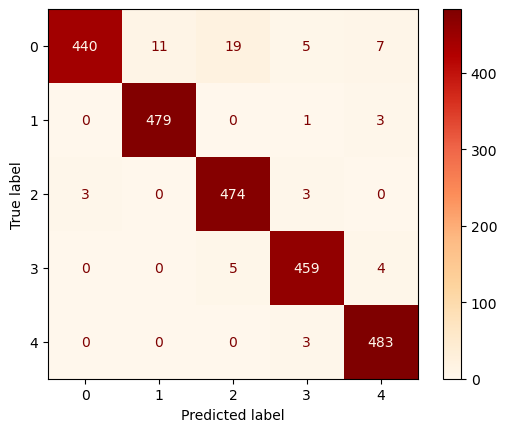

In [7]:
lgbm_clf2 = LGBMClassifier(boosting_type='gbdt',max_depth=-1,min_child_samples=20,learning_rate=0.05,
                           n_estimators=500,objective='multiclass',num_class=5,random_state=42,
                           early_stopping_round = 10,verbose=-1,)

lgbm_clf2.fit(X_train, y_train,eval_set=[(X_train, y_train),(X_test, y_test)],
    eval_metric='multiclass')

lgbm_acc2 = accuracy_score(y_test, lgbm_clf2.predict(X_test)) 


# 실제 데이터 test
lgbm_clf2_real_50 = accuracy_score(y_test_set_50, lgbm_clf2.predict(X_test_set_50))
lgbm_clf2_real_60 = accuracy_score(y_test_set_60, lgbm_clf2.predict(X_test_set_60))
lgbm_clf2_real_70 = accuracy_score(y_test_set_70, lgbm_clf2.predict(X_test_set_70))
lgbm_clf2_real_80 = accuracy_score(y_test_set_80, lgbm_clf2.predict(X_test_set_80))
lgbm_clf2_real_90 = accuracy_score(y_test_set_90, lgbm_clf2.predict(X_test_set_90))
lgbm_clf2_real_100 = accuracy_score(y_test_set_100, lgbm_clf2.predict(X_test_set_100))

#confusion_matrix
lgbm2_cm = confusion_matrix(y_test, lgbm_clf2.predict(X_test))
plot_confusion_matrix(lgbm_clf2, X_test, y_test, cmap='OrRd')
print(f"Classification Report :- \n {classification_report(y_test, lgbm_clf2.predict(X_test))}")
print("정확도 : ", lgbm_acc2)
print("실제 test_set_50 정확도 : ", lgbm_clf2_real_50)
print("실제 test_set_60 정확도 : ", lgbm_clf2_real_60)
print("실제 test_set_70 정확도 : ", lgbm_clf2_real_70)
print("실제 test_set_80 정확도 : ", lgbm_clf2_real_80)
print("실제 test_set_90 정확도 : ", lgbm_clf2_real_90)
print("실제 test_set_100 정확도 : ", lgbm_clf2_real_100)

In [13]:
models = pd.DataFrame({
    'Model' : ['50', '60', '70', '80', '90', '100',],
    'Score' : [lgbm_clf2_real_50,lgbm_clf2_real_60,lgbm_clf2_real_70,lgbm_clf2_real_80,lgbm_clf2_real_90,lgbm_clf2_real_100]
})

models.sort_values(by = 'Score', ascending = False)

px.bar(data_frame = models, x = 'Model', y = 'Score', color = 'Score', template = 'plotly_dark', title = 'LGBM Model')